## Example of batch processing of the pH calibration data 
This script automates the analysis of pH calibration experiments stored in a hierarchical folder structure. 

## Add package to python path and import function (s)

In [1]:
import sys
import os

# Manually set the parent directory path
notebook_dir = os.getcwd()  # This gets the current working directory of the notebook
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the parent directory to the system path
sys.path.insert(0, parent_dir)

#import an example function from package 
from flim_processing import analyze_single_fitted_channel,in_folder_loop

## Provide a path to the folder with pH calibration


In [2]:
from pathlib import Path

global_path=Path(r"G:\SP8_FLIM\0_Workflow_OPTIM\pH")

In [3]:
# Choose your figher 
selected_analysis_function = analyze_single_fitted_channel

## Iteration in the folders with hierarchical structure
The values for the respective pH are extracted from the folder names. The n of experiment is representated by 'date', when it was conducted 

In [4]:
import pandas as pd
from pathlib import Path
import natsort
from skimage.io import imsave

# Create the folder where all the outputs will be collected 
output_folder_path = global_path / 'Outputs'
output_folder_path.mkdir(exist_ok=True)

# Initialize master DataFrames and other data structures outside the loop
master_results = pd.DataFrame([])
master_reports = pd.DataFrame([])
report_images = []


# Iterate over all folders in the global_path directory
for day_path in global_path.iterdir():
    if day_path.is_dir() and day_path.stem != 'Outputs':
        
        date = day_path.stem
        print(f"Processing date folder: {date}")
        
        result_per_date = pd.DataFrame([])
        
        # treatment level
        for ph_calibration_path in day_path.iterdir():
            if ph_calibration_path.is_dir(): 
                
                ph = ph_calibration_path.stem
                print(f"  Processing pH folder: {ph}")
                
                result_per_folder,report_per_folder=in_folder_loop(ph_calibration_path,selected_analysis_function)

                # identifiction 
                result_per_folder['ph'] = ph
                result_per_folder['Date'] = date
                result_per_folder['selected_analysis'] = selected_analysis_function.__name__

                report_per_folder['ph'] = ph
                report_per_folder['Date'] = date
                report_per_folder['selected_analysis'] =selected_analysis_function.__name__
                
                # Concatenate the local table to the master DataFrame
                master_results = pd.concat([master_results, result_per_folder])
                master_reports = pd.concat([master_reports, report_per_folder])


master_reports

Processing date folder: 2023-10-12
  Processing pH folder: 75
  Processing pH folder: 50
  Processing pH folder: 55
  Processing pH folder: 60
  Processing pH folder: 65
  Processing pH folder: 70
Processing date folder: 2023-09-27
  Processing pH folder: 50
  Processing pH folder: 55
  Processing pH folder: 60
  Processing pH folder: 65
  Processing pH folder: 70
  Processing pH folder: 75


,Mean_fluor_intensity,Mean_tau,Mean_STD,Number_of_objects,Initial_number_of_objects,%_of_object_remained,File Name,ph,Date,selected_analysis
0,458.388802,1464.644861,39.235617,88,200,44.000000,1,75,2023-10-12,analyze_single_fitted_channel
0,508.032719,1398.292462,35.897515,19,74,25.675676,2,75,2023-10-12,analyze_single_fitted_channel
0,425.226502,1456.873384,33.651159,68,163,41.717791,3,75,2023-10-12,analyze_single_fitted_channel
0,543.114587,916.574729,27.352370,42,47,89.361702,50-1,50,2023-10-12,analyze_single_fitted_channel
0,377.161578,977.387448,18.404096,20,67,29.850746,50-2,50,2023-10-12,analyze_single_fitted_channel
0,503.359688,941.003788,27.609886,44,49,89.795918,50-3,50,2023-10-12,analyze_single_fitted_channel
0,518.724590,923.660051,29.547776,52,68,76.470588,1,55,2023-10-12,analyze_single_fitted_channel
0,484.317618,995.842561,25.479095,56,104,53.846154,2,55,2023-10-12,analyze_single_fitted_channel
0,473.951435,954.618977,26.612095,72,110,65.454545,3,55,2023-10-12,analyze_single_fitted_channel
0,434.172982,1108.633928,26.004366,72,149,48.322148,1,60,2023-10-12,analyze_single_fitted_channel


## Save results of analysis 
Examples of saving results locally or to the previously created specifed path 

In [5]:
# Save the master DataFrame as a CSV file
master_results.to_csv( "master_table.csv")
# Save the full table of stat reports per each image in the tree folders
master_reports.to_csv("master_reports.csv")


In [17]:
print("Saving master table...")
# Save the master DataFrame as a CSV file
master_results.to_csv(output_folder_path / "master_table.csv")

print("Saving table of reports...")
# Save the full table of stat reports per each image in the tree folders
master_reports.to_csv(output_folder_path / "master_reports.csv")

print("Processing complete!")

Saving master table...
Saving table of reports...
Processing complete!


## Example of plotting lifetime distribution 

C:\Users\med\mambaforge\envs\napari-flim-phasor-env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


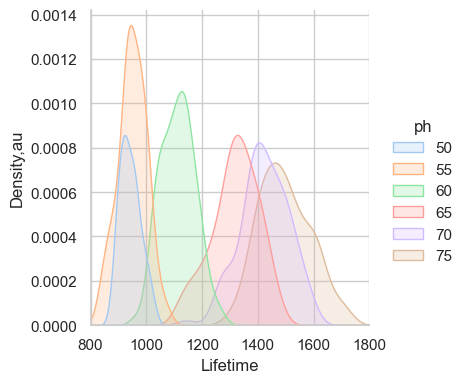

In [17]:
#Optional brif check of what you analized 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def random_choice(data, group_col='ph', n=100):
    sampled_groups = data.groupby(group_col).apply(lambda group: group.sample(min(len(group), n))).reset_index(drop=True)
    return sampled_groups


# Assuming 'data' is your DataFrame
sampled_data = random_choice(master_results, group_col='ph', n=100)


sns.set_theme(style="whitegrid", palette="pastel")
g = sns.displot(
    sampled_data,x="mean_tau", hue="ph",
    kind="kde", fill=True, 
    height=4,  
    
)
g.set_axis_labels("Lifetime", "Density,au")
g.set_titles("{col_name}")
g.set(xlim=(800,1800))
g

#g.savefig('plot.png') 
